In [201]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [202]:
df = pd.read_csv('./MarketData.csv')
print('Shape of data set ',df.shape)
df.head()

Shape of data set  (5232, 7)


,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-03,1469.250000,1478.000000,1438.359985,1455.219971,1455.219971,931800000
1,2000-01-04,1455.219971,1455.219971,1397.430054,1399.420044,1399.420044,1009000000
2,2000-01-05,1399.420044,1413.270020,1377.680054,1402.109985,1402.109985,1085500000
3,2000-01-06,1402.109985,1411.900024,1392.099976,1403.449951,1403.449951,1092300000
4,2000-01-07,1403.449951,1441.469971,1400.729980,1441.469971,1441.469971,1225200000


We notice in the visible values that, 'Adj Close' and 'Close' values look same. Checking on the whole dataset.

In [203]:
df[df.Close != df['Adj Close']].shape

(0, 7)

Both the columns contain same values. Hence we can drop one of the columns without affecting the data.

In [204]:
df.drop(['Adj Close'], axis = 1, inplace = True)

In [205]:
# Checking for NA values
df.isna().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [206]:
# Checking datatype of columns
df.dtypes

Date       object
Open      float64
High      float64
Low       float64
Close     float64
Volume      int64
dtype: object

In [207]:
df.Date = pd.to_datetime(df.Date)
df.head()

,Date,Open,High,Low,Close,Volume
0,2000-01-03,1469.250000,1478.000000,1438.359985,1455.219971,931800000
1,2000-01-04,1455.219971,1455.219971,1397.430054,1399.420044,1009000000
2,2000-01-05,1399.420044,1413.270020,1377.680054,1402.109985,1085500000
3,2000-01-06,1402.109985,1411.900024,1392.099976,1403.449951,1092300000
4,2000-01-07,1403.449951,1441.469971,1400.729980,1441.469971,1225200000


In [208]:
# Performing basis statistical checks
df.describe()

,Open,High,Low,Close,Volume
count,5232.000000,5232.000000,5232.000000,5232.000000,5.232000e+03
mean,1634.346903,1643.870727,1623.976516,1634.527020,3.164975e+09
std,649.457995,651.384321,647.211263,649.548486,1.516307e+09
min,679.280029,695.270020,666.789978,676.530029,3.560700e+08
25%,1161.485016,1169.445007,1151.432464,1161.425019,1.732522e+09
50%,1379.804993,1390.145019,1370.369995,1380.025024,3.270445e+09
75%,2059.962463,2070.492614,2045.802521,2059.942566,3.990660e+09
max,3564.739990,3588.110107,3535.229980,3580.840088,1.145623e+10


To identify the optimal number of clusters for daily volume data, let's apply Elbow method. This method helps

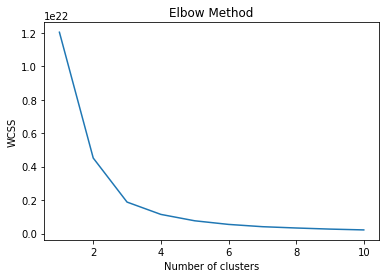

In [209]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df.Volume.values.reshape(-1,1))
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

1. <b>Distortion:</b> It is calculated as the average of the squared distances from the cluster centers of the respective clusters. Typically, the Euclidean distance metric is used.
2. <b>Inertia:</b> It is the sum of squared distances of samples to their closest cluster center.

In [210]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)
  
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(df.Volume.values.reshape(-1,1))
    kmeanModel.fit(df.Volume.values.reshape(-1,1))
  
    distortions.append(sum(np.min(cdist(df.Volume.values.reshape(-1,1), kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / df.Volume.values.reshape(-1,1).shape[0])
    inertias.append(kmeanModel.inertia_)
  
    mapping1[k] = sum(np.min(cdist(df.Volume.values.reshape(-1,1), kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / df.Volume.values.reshape(-1,1).shape[0]
    mapping2[k] = kmeanModel.inertia_

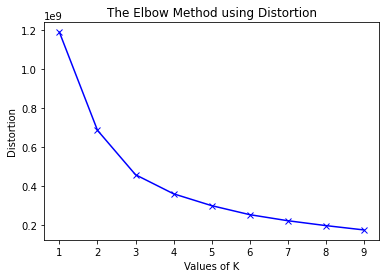

In [211]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

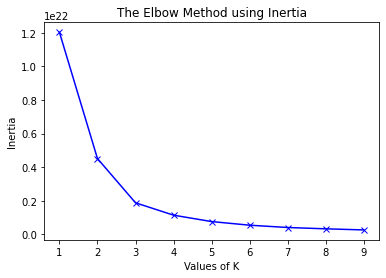

In [212]:
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

### Parameter Generation

In [213]:
def curr_vs_prev(dataframe, column):
    values = [0]
    for i in range(len(dataframe)):
        if i < len(dataframe) - 1:
            val = (dataframe.iloc[i+1][column]/dataframe.iloc[i][column]) - 1
            values.append(val)
        else:
            break
    return values

In [214]:
params = pd.DataFrame()

# Parameter 1 : fractional difference between current day open and previous day open
params['Open frac_diff'] = curr_vs_prev(df, 'Open') 

# Parameter 2 : fractional difference between current day open and current day close 
params['Curr_open_close frac_diff'] = (df.Open/df.Close) - 1 

# Parameter 3 : fractional difference between current day volume and previous day volume
params['Volume frac_diff'] = curr_vs_prev(df, 'Volume') 

params['Volume frac_diff'] = params['Volume frac_diff'].astype(float)
params['Open frac_diff']   = params['Open frac_diff'].astype(float)

params.head()

,Open frac_diff,Curr_open_close frac_diff,Volume frac_diff
0,0.000000,0.009641,0.000000
1,-0.009549,0.039874,0.082850
2,-0.038345,-0.001918,0.075818
3,0.001922,-0.000955,0.006264
4,0.000956,-0.026376,0.121670


In [254]:
from sklearn import mixture
from scipy import linalg
import itertools

lowest_bic = np.infty
bic = []
n_components_range = range(1, 10)
cv_types = ["spherical", "tied", "diag", "full"]
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a Gaussian mixture with EM
        gmm = mixture.GaussianMixture(
            n_components=n_components, covariance_type=cv_type
        )
        gmm.fit(params)
        bic.append(gmm.bic(params))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm = gmm
            

bic = np.array(bic)
color_iter = itertools.cycle(["navy", "turquoise", "cornflowerblue", "darkorange"])
clf = best_gmm
bars = []

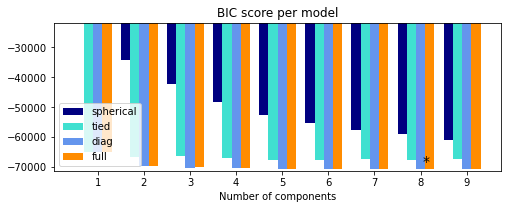

In [255]:
# Plot the BIC scores
plt.figure(figsize=(8, 6))
spl = plt.subplot(2, 1, 1)
for i, (cv_type, color) in enumerate(zip(cv_types, color_iter)):
    xpos = np.array(n_components_range) + 0.2 * (i - 2)
    bars.append(
        plt.bar(
            xpos,
            bic[i * len(n_components_range) : (i + 1) * len(n_components_range)],
            width=0.2,
            color=color,
        )
    )
plt.xticks(n_components_range)
plt.ylim([bic.min() * 1.01 - 0.01 * bic.max(), bic.max()])
plt.title("BIC score per model")
xpos = (
    np.mod(bic.argmin(), len(n_components_range))
    + 0.65
    + 0.2 * np.floor(bic.argmin() / len(n_components_range))
)
plt.text(xpos, bic.min() * 0.97 + 0.03 * bic.max(), "*", fontsize=14)
spl.set_xlabel("Number of components")
spl.legend([b[0] for b in bars], cv_types)

In [263]:
best_gmm

GaussianMixture(covariance_type='diag', n_components=8)

C:\Users\proto\anaconda3\lib\site-packages\matplotlib\collections.py:1003: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


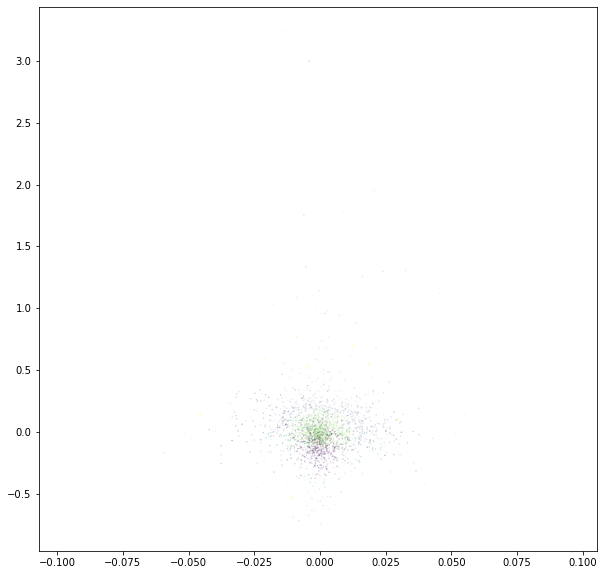

In [217]:
figure = plt.figure(figsize = (10,10))
plt.scatter(params['Curr_open_close frac_diff'], params['Volume frac_diff'],params['Open frac_diff'], 
           c = gmm.fit_predict(params))
plt.show()

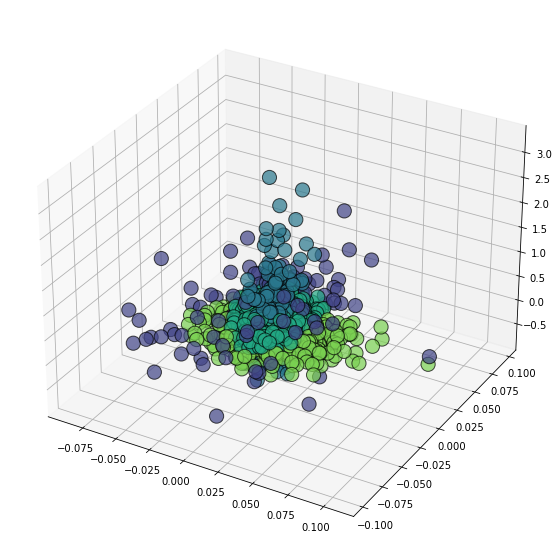

In [218]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(params['Open frac_diff'],params['Curr_open_close frac_diff'],params['Volume frac_diff'],
           linewidths=1,
           alpha=.7,
           edgecolor = 'k',
           s = 200,
           c = gmm.fit_predict(params))
plt.show()

In [219]:
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture 
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [262]:
# scaler = StandardScaler() 
# scaled_df = scaler.fit_transform(params) 
  
# # Normalizing the Data 
# normalized_df = normalize(scaled_df) 
  
# # Converting the numpy array into a pandas DataFrame 
# normalized_df = pd.DataFrame(normalized_df) 
  
# Reducing the dimensions of the data 
pca = PCA(n_components = 2) 
X_principal = pca.fit_transform(params) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2'] 
  
X_principal.head()


,P1,P2
0,-0.018276,0.005263
1,0.064671,0.014408
2,0.057576,-0.032933
3,-0.012044,0.000877
4,0.103295,-0.014261


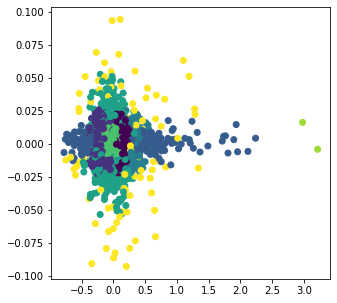

In [265]:
figure = plt.figure(figsize = (5,5))

plt.scatter(X_principal['P1'], X_principal['P2'], 
           c = clf.fit_predict(params)) 
plt.show() 

## Part 3

#### Monthly Returns

In [276]:
df['Month'] = df.Date.dt.month
df['Year'] = df.Date.dt.year
df

,Date,Open,High,Low,Close,Volume,Month,Year
0,2000-01-03,1469.250000,1478.000000,1438.359985,1455.219971,931800000,1,2000
1,2000-01-04,1455.219971,1455.219971,1397.430054,1399.420044,1009000000,1,2000
2,2000-01-05,1399.420044,1413.270020,1377.680054,1402.109985,1085500000,1,2000
3,2000-01-06,1402.109985,1411.900024,1392.099976,1403.449951,1092300000,1,2000
4,2000-01-07,1403.449951,1441.469971,1400.729980,1441.469971,1225200000,1,2000
...,...,...,...,...,...,...,...,...
5227,2020-10-12,3500.020020,3549.850098,3499.610107,3534.219971,3428970000,10,2020
5228,2020-10-13,3534.010010,3534.010010,3500.860107,3511.929932,3605150000,10,2020
5229,2020-10-14,3515.469971,3527.939941,3480.550049,3488.669922,3840630000,10,2020
5230,2020-10-15,3453.719971,3489.080078,3440.889893,3483.340088,3717640000,10,2020


In [266]:
df.groupby(['Year','Month']).aggregate(['first','last']).loc[:,'Close'].loc[:,'last']

Year  Month
2000  1        1394.459961
      2        1366.420044
      3        1498.579956
      4        1452.430054
      5        1420.599976
                  ...     
2020  6        3100.290039
      7        3271.120117
      8        3500.310059
      9        3363.000000
      10       3483.810059
Name: last, Length: 250, dtype: float64

In [275]:
# Year = [Year for Year, df in df.groupby(['Year', 'Month']).mean()]
df.groupby(['Year','Month']).aggregate(['first','last']).columns

MultiIndex([(  'Date', 'first'),
            (  'Date',  'last'),
            (  'Open', 'first'),
            (  'Open',  'last'),
            (  'High', 'first'),
            (  'High',  'last'),
            (   'Low', 'first'),
            (   'Low',  'last'),
            ( 'Close', 'first'),
            ( 'Close',  'last'),
            ('Volume', 'first'),
            ('Volume',  'last')],
           )

In [270]:
df.groupby(['Year','Month']).aggregate(['first','last'])

Date                    Open                      High  \
                first       last        first         last        first   
Year Month                                                                
2000 1     2000-01-03 2000-01-31  1469.250000  1360.160034  1478.000000   
     2     2000-02-01 2000-02-29  1394.459961  1348.050049  1412.489990   
     3     2000-03-01 2000-03-31  1366.420044  1487.920044  1383.459961   
     4     2000-04-03 2000-04-28  1498.579956  1464.920044  1507.189941   
     5     2000-05-01 2000-05-31  1452.430054  1422.439941  1481.510010   
...               ...        ...          ...          ...          ...   
2020 6     2020-06-01 2020-06-30  3038.780029  3050.199951  3062.179932   
     7     2020-07-01 2020-07-31  3105.919922  3270.449951  3128.439941   
     8     2020-08-03 2020-08-31  3288.260010  3509.729980  3302.729980   
     9     2020-09-01 2020-09-30  3507.439941  3341.209961  3528.030029   
     10    2020-10-01 2020-10-16  3385.870117  3493.500000  3397.179932   

                                 Low                     Close               \
                   last        first         last        first         last   
Year Month                                                                    
2000 1      1394.479980  1438.359985  1350.140015  1455.219971  1394.459961   
     2      1369.630005  1384.790039  1348.050049  1409.280029  1366.420044   
     3      1519.810059  1366.420044  1484.380005  1379.189941  1498.579956   
     4      1473.619995  1486.959961  1448.150024  1505.969971  1452.430054   
     5      1434.489990  1452.430054  1415.500000  1468.250000  1420.599976   
...                 ...          ...          ...          ...          ...   
2020 6      3111.510010  3031.540039  3047.830078  3055.729980  3100.290039   
     7      3272.169922  3101.169922  3220.260010  3115.860107  3271.120117   
     8      3514.770020  3284.530029  3493.250000  3294.610107  3500.310059   
     9      3393.560059  3494.600098  3340.469971  3526.649902  3363.000000   
     10     3515.760010  3361.389893  3480.449951  3380.800049  3483.810059   

                Volume              
                 first        last  
Year Month                          
2000 1       931800000   993800000  
     2       981000000  1204300000  
     3      1274100000  1227400000  
     4      1021700000   984600000  
     5       966300000   960500000  
...                ...         ...  
2020 6      4673410000  4696280000  
     7      4443130000  5117260000  
     8      4643640000  4342290000  
     9      4083110000  4722530000  
     10     4070530000  4675890000  

[250 rows x 12 columns]

In [222]:
# Function to calculate fractional difference between month's closing price(last day) and closing price(first day)

returns = []
def month_returns_func(data, mon):
    for i in range(len(mon)):
        first = data.loc[data.index[data.Date.dt.month == i+1].tolist()[0]].Close
        last  = data.loc[data.index[data.Date.dt.month == i+1].tolist()[-1]].Close
    
        final = (last / first) - 1
        returns.append(first, )
    
    return returns

In [277]:
# Monthly returns = [Closing price (last day) / Closing price (first day)] - 1 

def monthly_returns_fun():
    first = df.groupby(['Year','Month']).aggregate(['first','last']).loc[:,'Close'].loc[:,'first']
    last = df.groupby(['Year','Month']).aggregate(['first','last']).loc[:,'Close'].loc[:,'last']
    
    final = (last / first) - 1
    
    return pd.DataFrame(final)

In [283]:
temp = monthly_returns_fun()
temp.columns = ['Monthly_Returns']
print(temp.shape)
temp.head()

(250, 1)


Monthly_Returns
Year Month                 
2000 1            -0.041753
     2            -0.030413
     3             0.086565
     4            -0.035552
     5            -0.032454

In [284]:
temp['Target'] = (temp['Monthly_Returns'] > 0).astype(int)
temp.head()

Monthly_Returns  Target
Year Month                         
2000 1            -0.041753       0
     2            -0.030413       0
     3             0.086565       1
     4            -0.035552       0
     5            -0.032454       0

In [318]:
def convert_to_std_dataframe(dataset, colname):
    dataset.columns = [colname]
    dataset['Year']  = dataset.index.get_level_values('Year') # extracting year from the index
    dataset['Month'] = dataset.index.get_level_values('Month') # extracting month from the index
    dataset.index = range(len(temp)) # setting the index to standard

    return dataset

In [300]:
def monthly_volume_fun():
    first = df.groupby(['Year','Month']).aggregate(['first','last']).loc[:,'Volume'].loc[:,'first']
    last = df.groupby(['Year','Month']).aggregate(['first','last']).loc[:,'Volume'].loc[:,'last']
    
    final = (last / first) - 1
    
    return pd.DataFrame(final)

In [301]:
def monthly_high_fun():
    first = df.groupby(['Year','Month']).aggregate(['first','last']).loc[:,'High'].loc[:,'first']
    last = df.groupby(['Year','Month']).aggregate(['first','last']).loc[:,'Low'].loc[:,'last']
    
    final = (last / first) - 1
    
    return pd.DataFrame(final)

In [302]:
def monthly_low_fun():
    first = df.groupby(['Year','Month']).aggregate(['first','last']).loc[:,'Low'].loc[:,'first']
    last = df.groupby(['Year','Month']).aggregate(['first','last']).loc[:,'Low'].loc[:,'last']
    
    final = (last / first) - 1
    
    return pd.DataFrame(final)

In [296]:
# rand = temp.copy()

def prev_monthly_return():
    for i in range(len(temp)):
        temp.prev_return.loc[i+1] = temp.Monthly_Returns.loc[i]
    return temp

In [321]:
vol, low, high = monthly_volume_fun(), monthly_low_fun(), monthly_high_fun()

In [322]:
vol,low,high = convert_to_std_dataframe(vol, 'Vol'),convert_to_std_dataframe(low, 'Low'),convert_to_std_dataframe(high, 'High')

In [299]:
newtemp = prev_monthly_return()
newtemp

C:\Users\proto\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,Monthly_Returns,Target,Year,Month,prev_return
0,-0.041753,0,2000,1,0.000000
1,-0.030413,0,2000,2,-0.041753
2,0.086565,1,2000,3,-0.030413
3,-0.035552,0,2000,4,0.086565
4,-0.032454,0,2000,5,-0.035552
...,...,...,...,...,...
245,0.014582,1,2020,6,0.075458
246,0.049829,1,2020,7,0.014582
247,0.062435,1,2020,8,0.049829
248,-0.046404,0,2020,9,0.062435


In [289]:
temp['prev_return'] = 0
temp.head()

,Monthly_Returns,Target,Year,Month,prev_return
0,-0.041753,0,2000,1,0
1,-0.030413,0,2000,2,0
2,0.086565,1,2000,3,0
3,-0.035552,0,2000,4,0
4,-0.032454,0,2000,5,0
